In [7]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import ipywidgets as widgets
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

### Load Data

In [9]:
# Load the data
df = pd.read_csv('/Users/soniahusain/Documents/Python for fun/Salary/Salary_Data.csv')

### Clean Data

In [10]:
# check for nulls
display(df[df.isna().any(axis=1)])
display(df.isnull().sum())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN
2011,27.0,Male,NaN,Developer,7.0,100000.0
3136,31.0,Male,Master's Degree,Full Stack Engineer,8.0,NaN
5247,26.0,Female,Bachelor's Degree,Social M,NaN,NaN
6455,36.0,Male,Bachelor's Degree,Sales Director,6.0,NaN


Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [11]:
# drop nulls
df = df.dropna()

display(df)
print(df.isnull().sum())

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [12]:
#check for uniques
print(df['Gender'].unique())
print(df['Education Level'].unique())

['Male' 'Female' 'Other']
["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']


In [13]:
df['Education Level'] = df['Education Level'].replace(["Bachelor's", "Bachelor's Degree"], "Bachelor")
df['Education Level'] = df['Education Level'].replace(["Master's", "Master's Degree"], "Master")
df['Education Level'] = df['Education Level'].replace("phD","PhD")

In [14]:
# check for uniques
print(df['Gender'].unique())
print(df['Education Level'].unique())

['Male' 'Female' 'Other']
['Bachelor' 'Master' 'PhD' 'High School']


In [15]:
# distribution per columns
print(df['Gender'].value_counts())
print(df['Education Level'].value_counts())
print(df['Job Title'].value_counts())

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64
Bachelor       3021
Master         1860
PhD            1369
High School     448
Name: Education Level, dtype: int64
Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64


## Questions
#### Distribution:
- look at distribution of age, education level, and job title. along with avg salary

#### Relationship:
- Find a correlation and maybe build a predictive model out of that?

### Distribution: Age


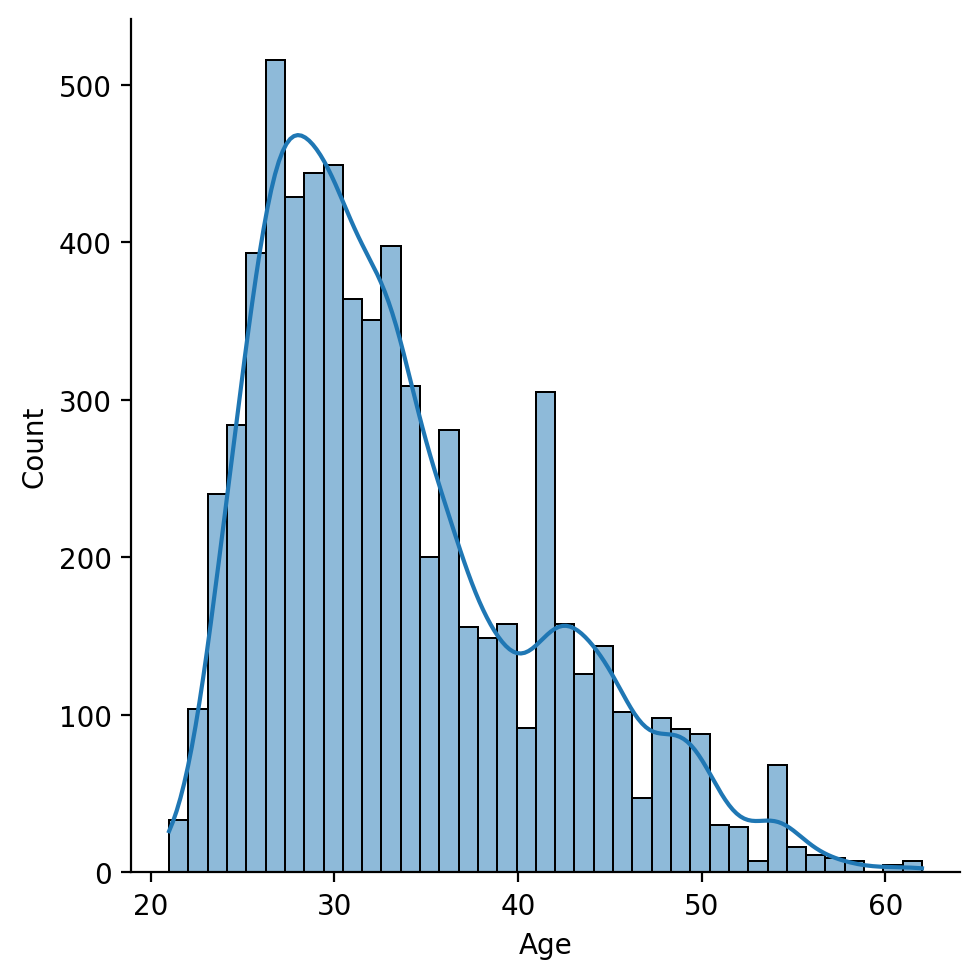

In [16]:
sns.displot(x = 'Age', data = df, kde = True)
plt.show()

# sns.boxplot(x=df["Age"])
# plt.show()

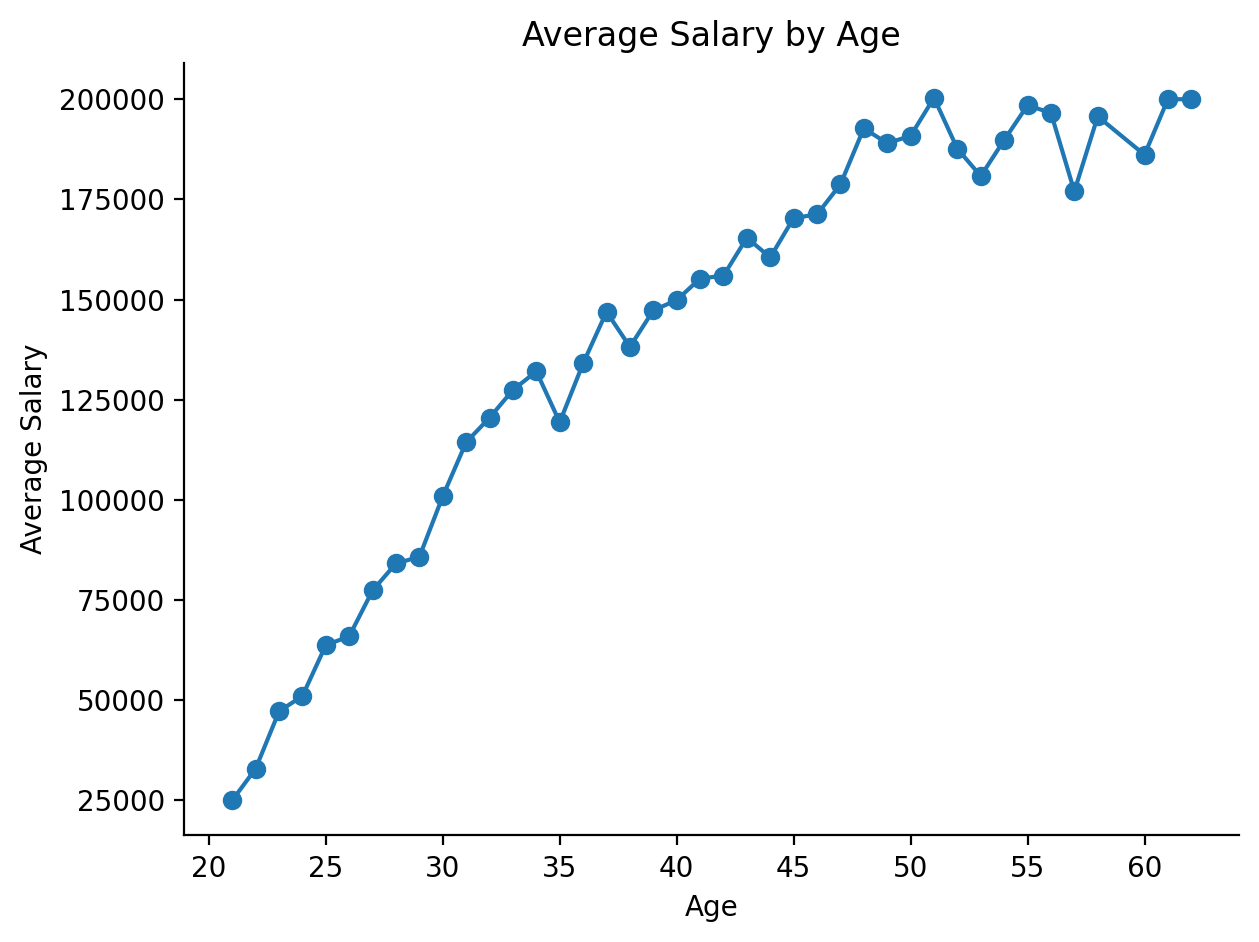

Minimum Average Salary:
Age: 21.0
Average Salary: 25000.0

Maximum Average Salary:
Age: 51.0
Average Salary: 200356.06666666668


In [17]:
# Data
avg_salary_by_age = df.groupby('Age')['Salary'].mean()

# Create a line plot
plt.plot(avg_salary_by_age.index, avg_salary_by_age.values, marker='o')

# avg_salary_by_education.sort_values(ascending = False).plot(kind = 'bar')

# Cosmetics
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Average Salary by Age')
plt.xticks(np.arange(min(avg_salary_by_age.index)-1, max(avg_salary_by_age.index)+1, 5))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

# min and max
min_row = avg_salary_by_age.idxmin()
max_row = avg_salary_by_age.idxmax()

min_age, min_avg_salary = min_row, avg_salary_by_age[min_row]
max_age, max_avg_salary = max_row, avg_salary_by_age[max_row]

print("Minimum Average Salary:")
print("Age:", min_age)
print("Average Salary:", min_avg_salary)

print("\nMaximum Average Salary:")
print("Age:", max_age)
print("Average Salary:", max_avg_salary)

### Distribution: Job Title

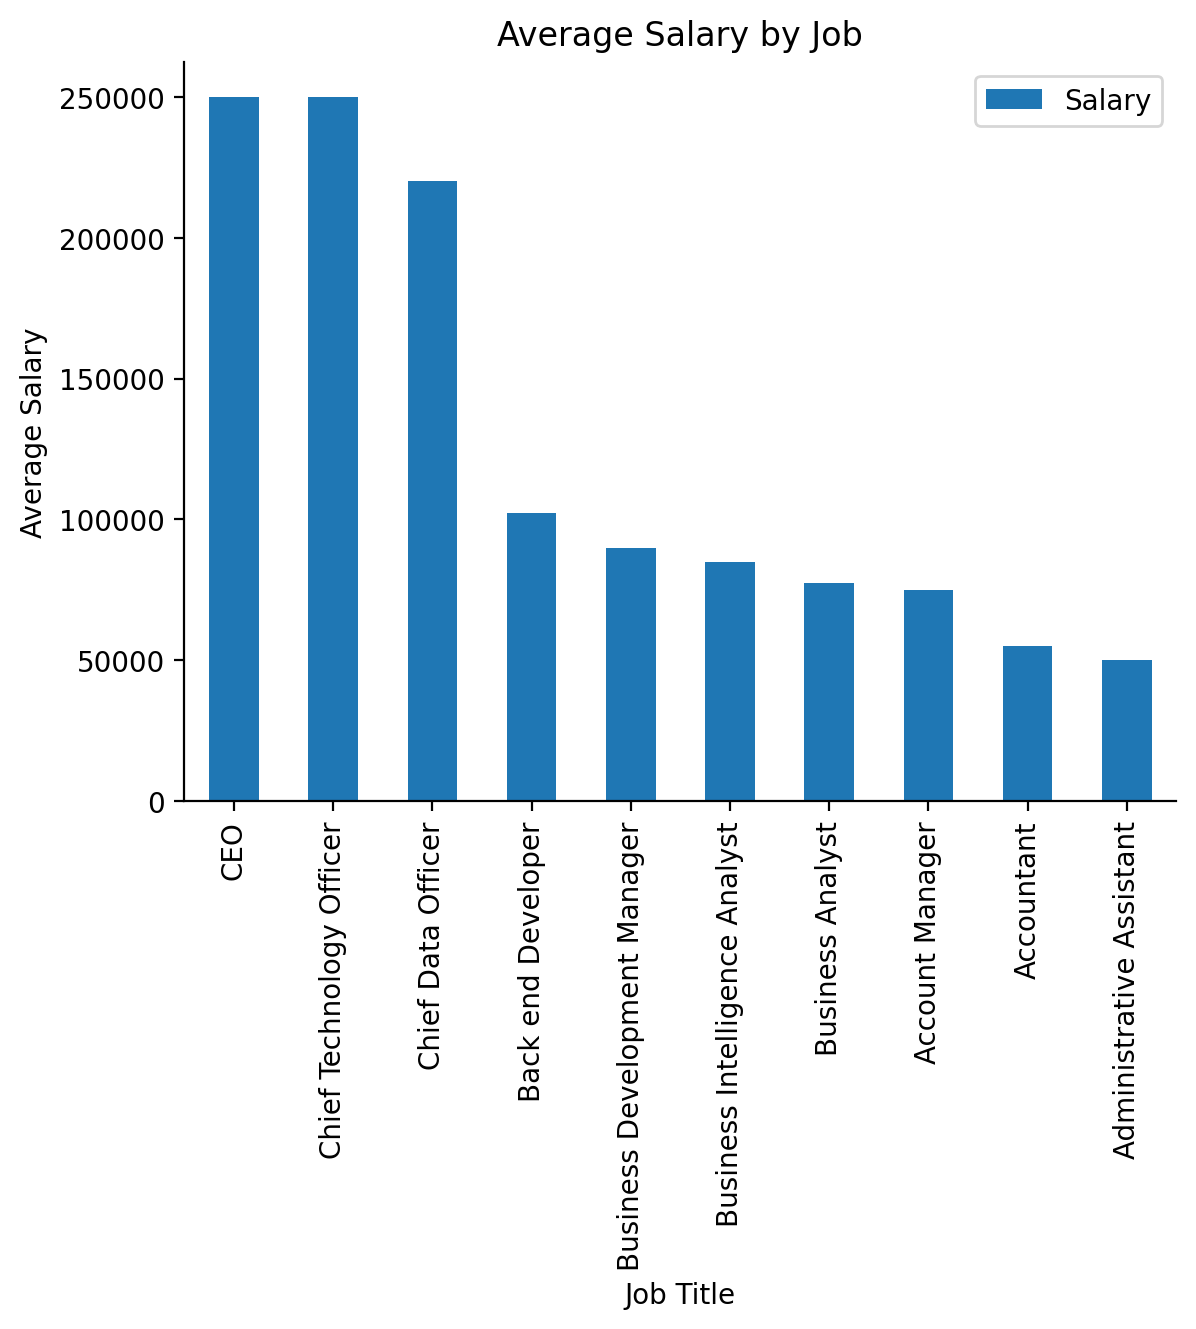

Minimum Average Salary:
Job: Junior Business Operations Analyst
Average Salary: 17675.0

Maximum Average Salary:
Job: CEO
Average Salary: 250000.0


In [18]:
# Data
avg_salary_by_job = df.groupby('Job Title')['Salary'].mean()
top_10_job_titles = avg_salary_by_job.head(10)

# Create a line plot
top_10_job_titles.sort_values(ascending = False).plot(kind = 'bar')

# Cosmetics
plt.ylabel('Average Salary')
plt.title('Average Salary by Job')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.legend()
plt.show()


min_row = avg_salary_by_job.idxmin()
max_row = avg_salary_by_job.idxmax()

min_job, min_avg_salary = min_row, avg_salary_by_job[min_row]
max_job, max_avg_salary = max_row, avg_salary_by_job[max_row]

print("Minimum Average Salary:")
print("Job:", min_job)
print("Average Salary:", min_avg_salary)

print("\nMaximum Average Salary:")
print("Job:", max_job)
print("Average Salary:", max_avg_salary)

### Distribution: Education Level


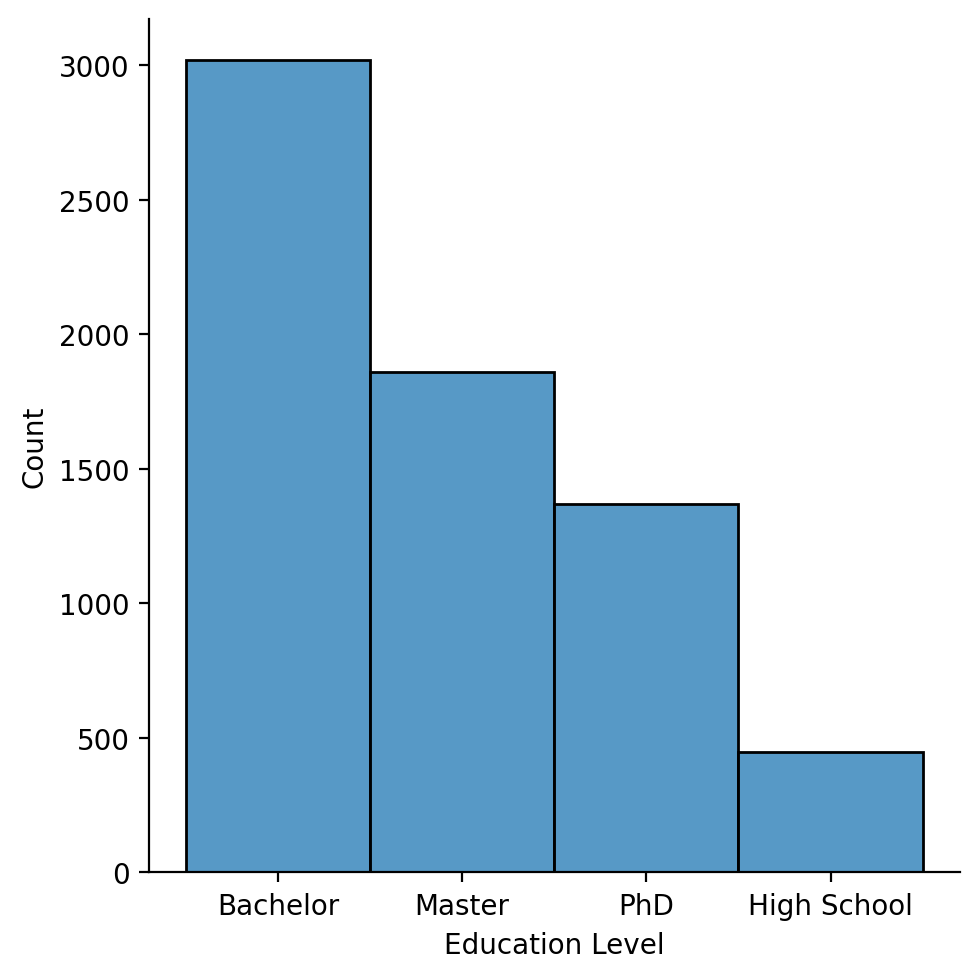

In [19]:
sns.displot(x = 'Education Level', data = df)
plt.show()

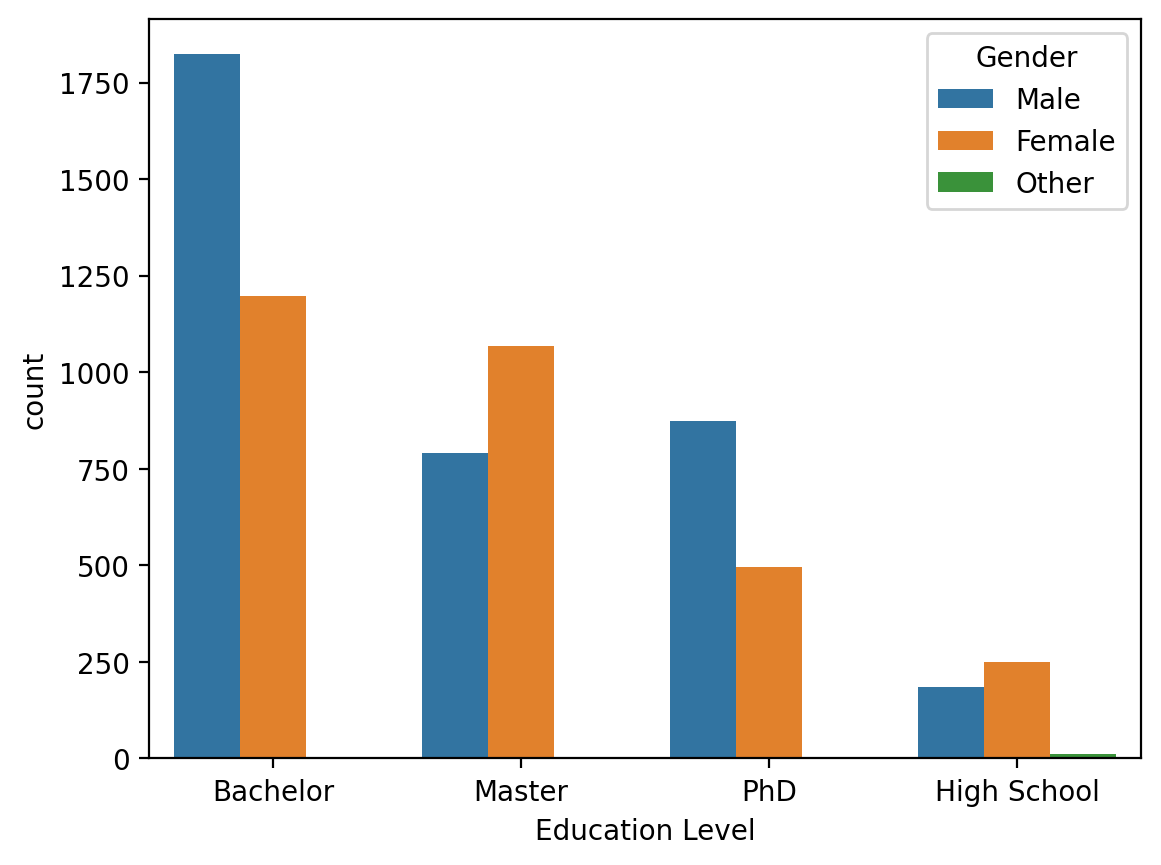

In [20]:
sns.countplot(x = 'Education Level', data = df, hue = 'Gender')
plt.show()

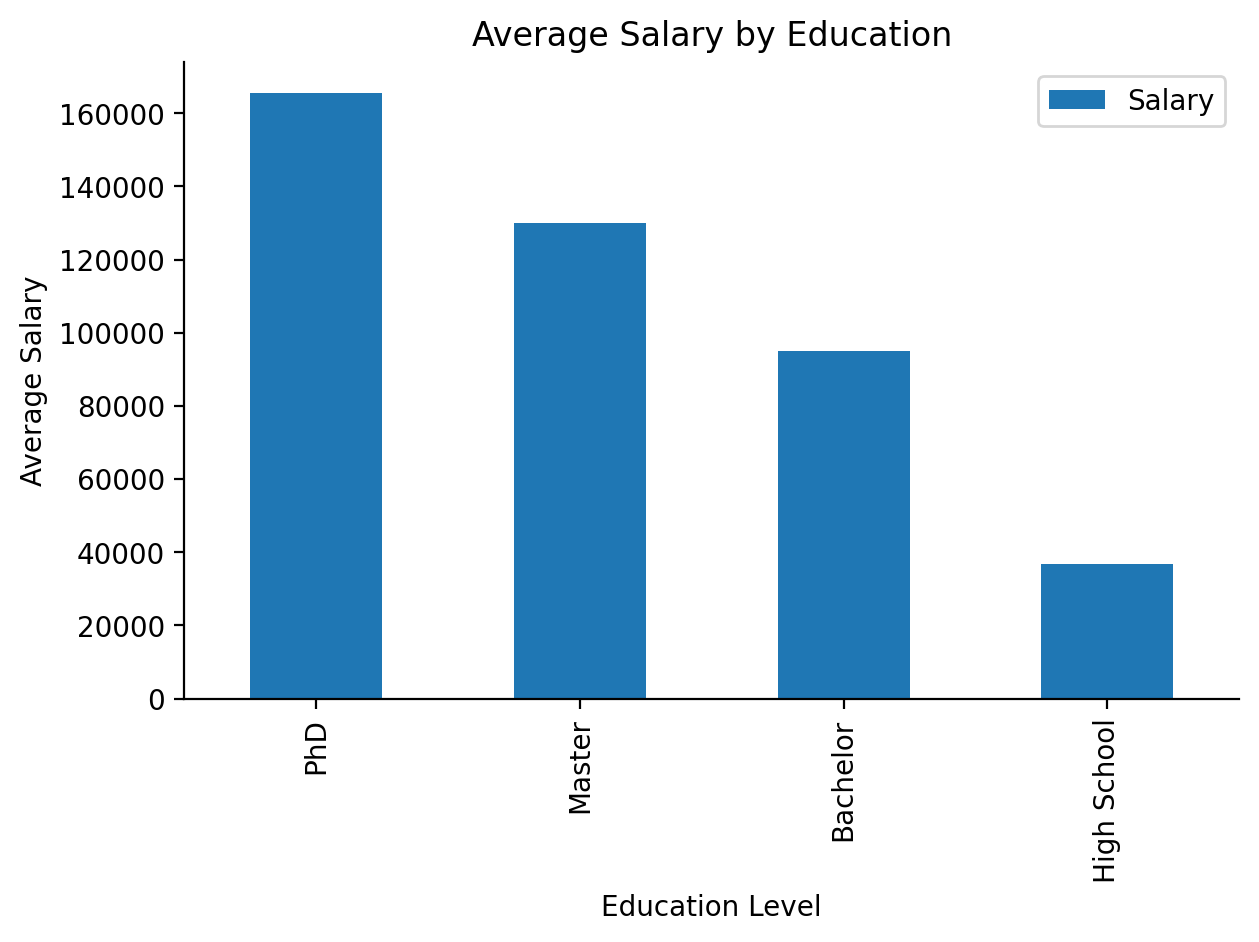

Minimum Average Salary:
Education: High School
Average Salary: 36706.69419642857

Maximum Average Salary:
Education: PhD
Average Salary: 165651.4579985391


In [21]:
# Data
avg_salary_by_education = df.groupby('Education Level')['Salary'].mean()

# Create a line plot
avg_salary_by_education.sort_values(ascending = False).plot(kind = 'bar')

# Cosmetics
plt.ylabel('Average Salary')
plt.title('Average Salary by Education')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()


min_row = avg_salary_by_education.idxmin()
max_row = avg_salary_by_education.idxmax()

min_education, min_avg_salary = min_row, avg_salary_by_education[min_row]
max_education, max_avg_salary = max_row, avg_salary_by_education[max_row]

print("Minimum Average Salary:")
print("Education:", min_education)
print("Average Salary:", min_avg_salary)

print("\nMaximum Average Salary:")
print("Education:", max_education)
print("Average Salary:", max_avg_salary)

### Distribution: Years of Experience

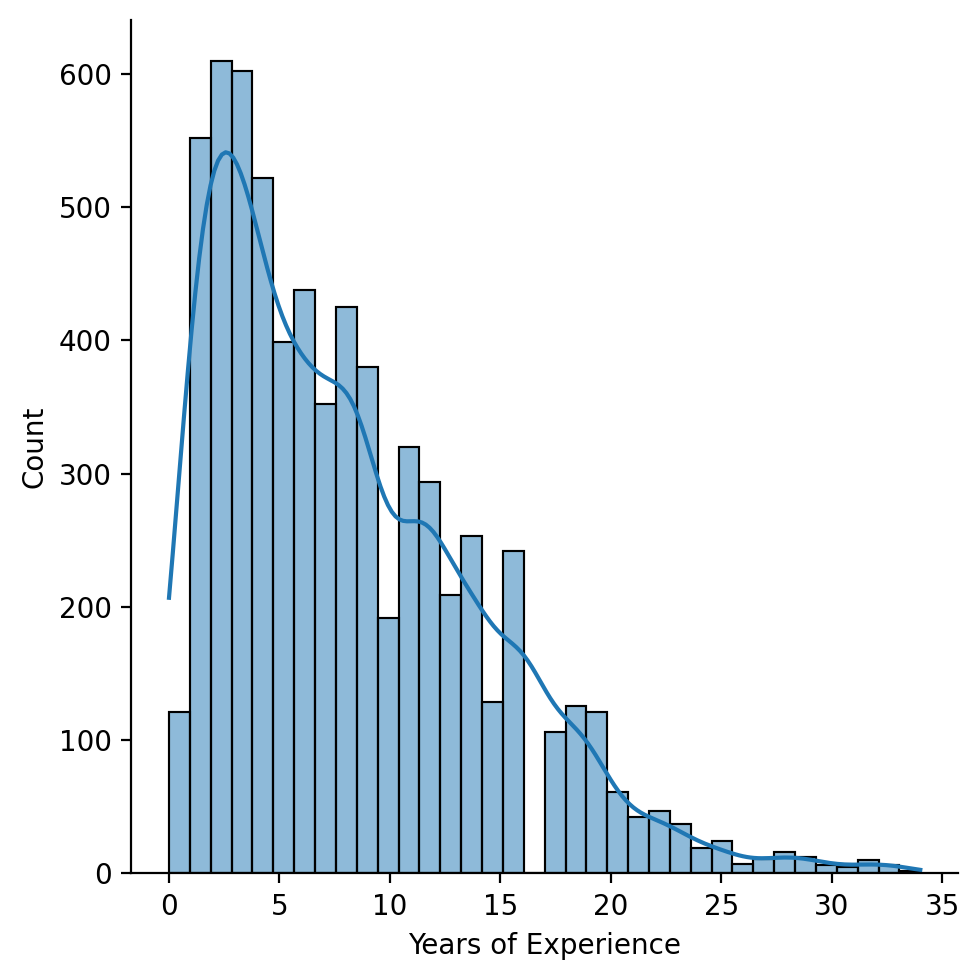

In [22]:
sns.displot(x = 'Years of Experience', data = df, kde = True)
plt.show()

# sns.boxplot(x=df["Years of Experience"])
# plt.show()

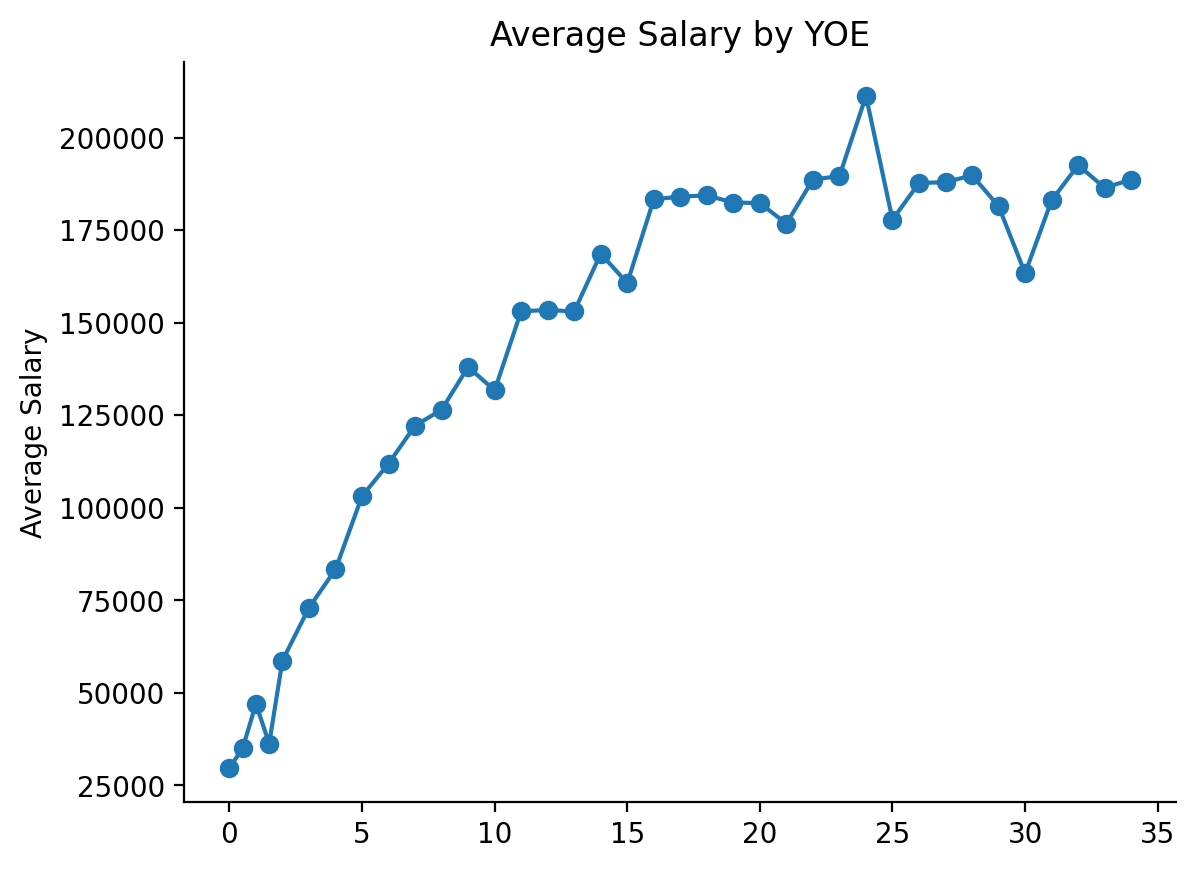

Minimum Average Salary:
YOE: 0.0
Average Salary: 29680.233333333334

Maximum Average Salary:
YOE: 24.0
Average Salary: 211225.42105263157


In [23]:
# Data
avg_salary_by_yoe = df.groupby('Years of Experience')['Salary'].mean()

# Create a line plot
plt.plot(avg_salary_by_yoe.index, avg_salary_by_yoe.values, marker='o')

# Cosmetics
plt.ylabel('Average Salary')
plt.title('Average Salary by YOE')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# show plot
plt.show()


min_row = avg_salary_by_yoe.idxmin()
max_row = avg_salary_by_yoe.idxmax()

min_yoe, min_avg_salary = min_row, avg_salary_by_yoe[min_row]
max_yoe, max_avg_salary = max_row, avg_salary_by_yoe[max_row]

print("Minimum Average Salary:")
print("YOE:", min_yoe)
print("Average Salary:", min_avg_salary)

print("\nMaximum Average Salary:")
print("YOE:", max_yoe)
print("Average Salary:", max_avg_salary)

## Relationships
find a correlation and build some sort of regression model

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6698.0,33.623022,7.615784,21.0,28.0,32.0,38.0,62.0
Years of Experience,6698.0,8.095178,6.060291,0.0,3.0,7.0,12.0,34.0
Salary,6698.0,115329.253061,52789.792507,350.0,70000.0,115000.0,160000.0,250000.0


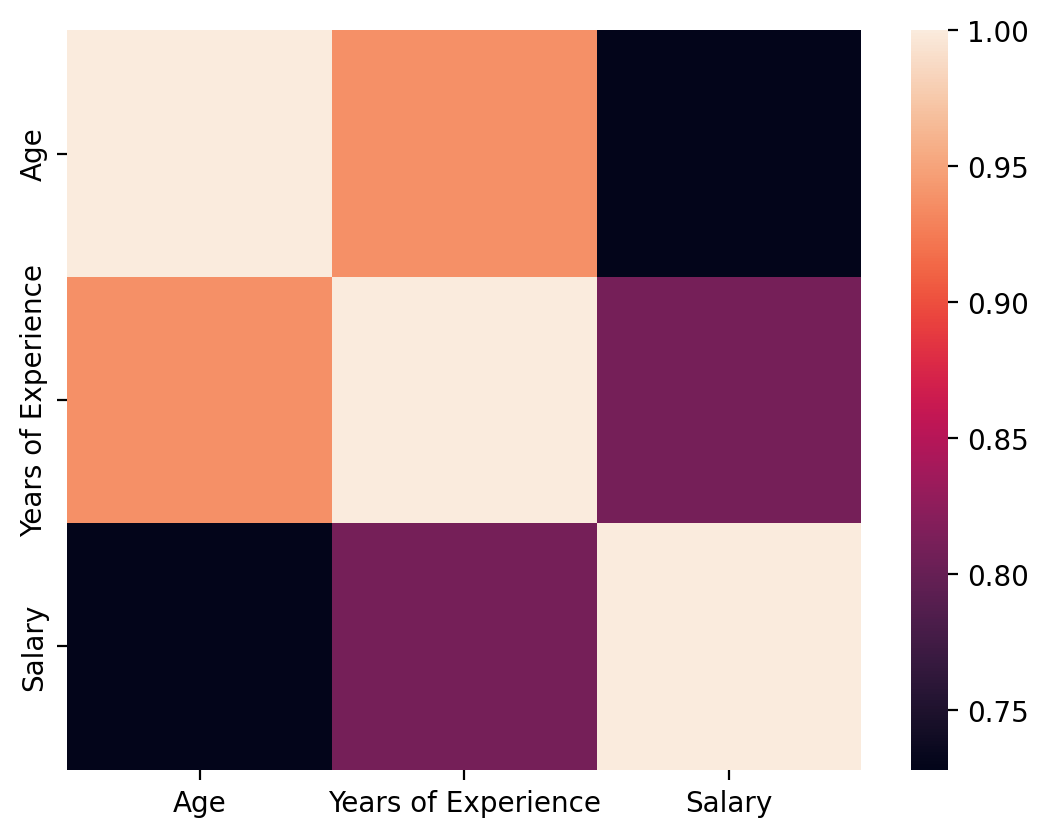

In [25]:
sns.heatmap(df.corr());

want to include education level and gender

In [26]:
# Create mappings for education level and gender
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
gender_mapping = {'Male': 0, 'Female': 1}

# Apply mappings to the DataFrame
df['Education Level Int'] = df['Education Level'].map(education_mapping)
df['Gender Int'] = df['Gender'].map(gender_mapping)

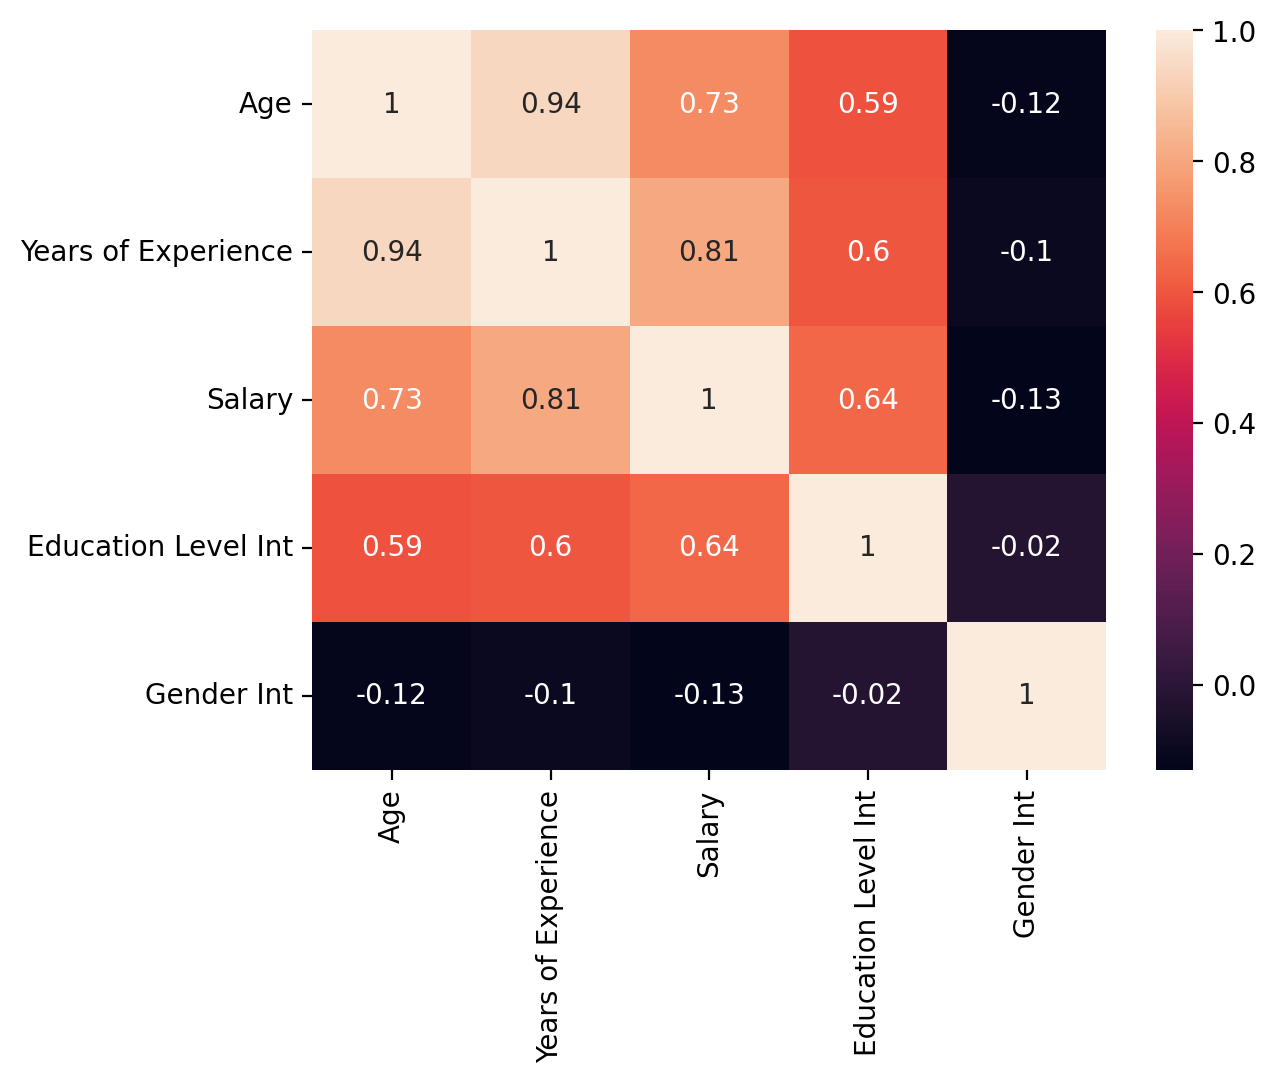

In [27]:
sns.heatmap(df.corr().round(2), annot=True);

A correlation matrix is a common tool used to compare the coefficients of correlation between different features (or attributes) in a dataset. It allows us to visualize how much (or how little) correlation exists between different variables.

The values in our matrix are the correlation coefficients between the pairs of features. but what even is a Correlation Coefficient? A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables.
- The closer the value is to 1 (or -1), the stronger a relationship
    - A negative coefficient will tell us that the relationship is negative, meaning that as one value increases, the other decreases. Similarly, a positive coefficient indicates that as one value increases, so does the other
- The closer a number is to 0, the weaker the relationship

In [28]:
model = LinearRegression()

x = df[['Years of Experience']]
y = df[['Salary']]

model.fit(x,y)
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6544294992867407


From the above R square we can find that the independent variable (YOE) explains 65% of dependent variable (salary). Thats p good but what if we add in another variable so that we can increase our r squared value

In [29]:
x = df[['Years of Experience', 'Age']]
y = df[['Salary']]

model.fit(x,y)
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.6621532808507764


didn't really increase out r squared by that much. so for simplicity lets just use years of experience and see if other regression models give us a higher r squared value

In [30]:
x = df[['Years of Experience', 'Age', 'Education Level Int']]
y = df[['Salary']]

model.fit(x,y)
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7033235646670155


## Find best fit model
along with with r squared value, we can measure MSE. MSE stands for Mean Squared Error, and it is a metric used to measure the average squared difference between the predicted and actual values in a regression problem. By squaring the differences between the predicted and actual values, the metric penalizes larger errors more heavily, giving a higher weight to outliers. A lower MSE indicates that the model has smaller prediction errors and better fits the data. 

In [31]:
# creating train and test sets
# x = df[['Years of Experience', 'Age', 'Education Level Int']]
x = df[['Years of Experience']]
y = df[['Salary']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

# Model 1: linear regression 
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train) #fit model
y_pred_linear = linear_reg.predict(x_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Model 2: Polynomial Regression
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train) #fit model
x_test_poly = poly_features.transform(x_test)
y_pred_poly = poly_reg.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Model 3: Logarithmic Regression
log_reg = LinearRegression()
epsilon = 1e-8  # Small constant because x was 0 in some cases
log_x_train = np.log(x_train + epsilon)
log_x_test = np.log(x_test + epsilon)
log_reg.fit(log_x_train, y_train)
y_pred_log = log_reg.predict(log_x_test)
mse_log = mean_squared_error(y_test, y_pred_log)
r2_log = r2_score(y_test, y_pred_log)

print("linear model:")
print("Linear Mean Squared Error (MSE):", mse_linear)
print(f"Linear Coefficient of Determination (R-squared): {r2_linear}\n")

print("Polynomial model:")
print("Poly Mean Squared Error (MSE):", mse_poly)
print(f"Poly Coefficient of Determination (R-squared): {r2_poly}\n")

print("Logarithmic model:")
print("Logarithmic Mean Squared Error (MSE):", mse_log)
print(f"Logarithmic Coefficient of Determination (R-squared): {r2_log}\n")

linear model:
Linear Mean Squared Error (MSE): 988058462.0391415
Linear Coefficient of Determination (R-squared): 0.6521398724130494

Polynomial model:
Poly Mean Squared Error (MSE): 755539025.1048107
Poly Coefficient of Determination (R-squared): 0.7340016691649284

Logarithmic model:
Logarithmic Mean Squared Error (MSE): 2240721877.743657
Logarithmic Coefficient of Determination (R-squared): 0.21112178254093827



### Polynomial Model
Both the linear model and polynomial model have better MSEs and r squared values compared to the logarithmic model. Since the polynomial one seems to be a better fit lets start with that. 

In [32]:
# creating train and test sets
# x = df[['Years of Experience', 'Age', 'Education Level Int']]
x = df[['Years of Experience']]
y = df[['Salary']]

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=101)

# Model 2: Polynomial Regression
poly_features = PolynomialFeatures(degree=4)
x_poly = poly_features.fit_transform(x_train)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y_train) #fit model
x_test_poly = poly_features.transform(x_test)
y_pred_poly = poly_reg.predict(x_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial model:")
print("Poly Mean Squared Error (MSE):", mse_poly)
print(f"Poly Coefficient of Determination (R-squared): {r2_poly}\n")

Polynomial model:
Poly Mean Squared Error (MSE): 755539025.1048107
Poly Coefficient of Determination (R-squared): 0.7340016691649284



#### Scatter plot

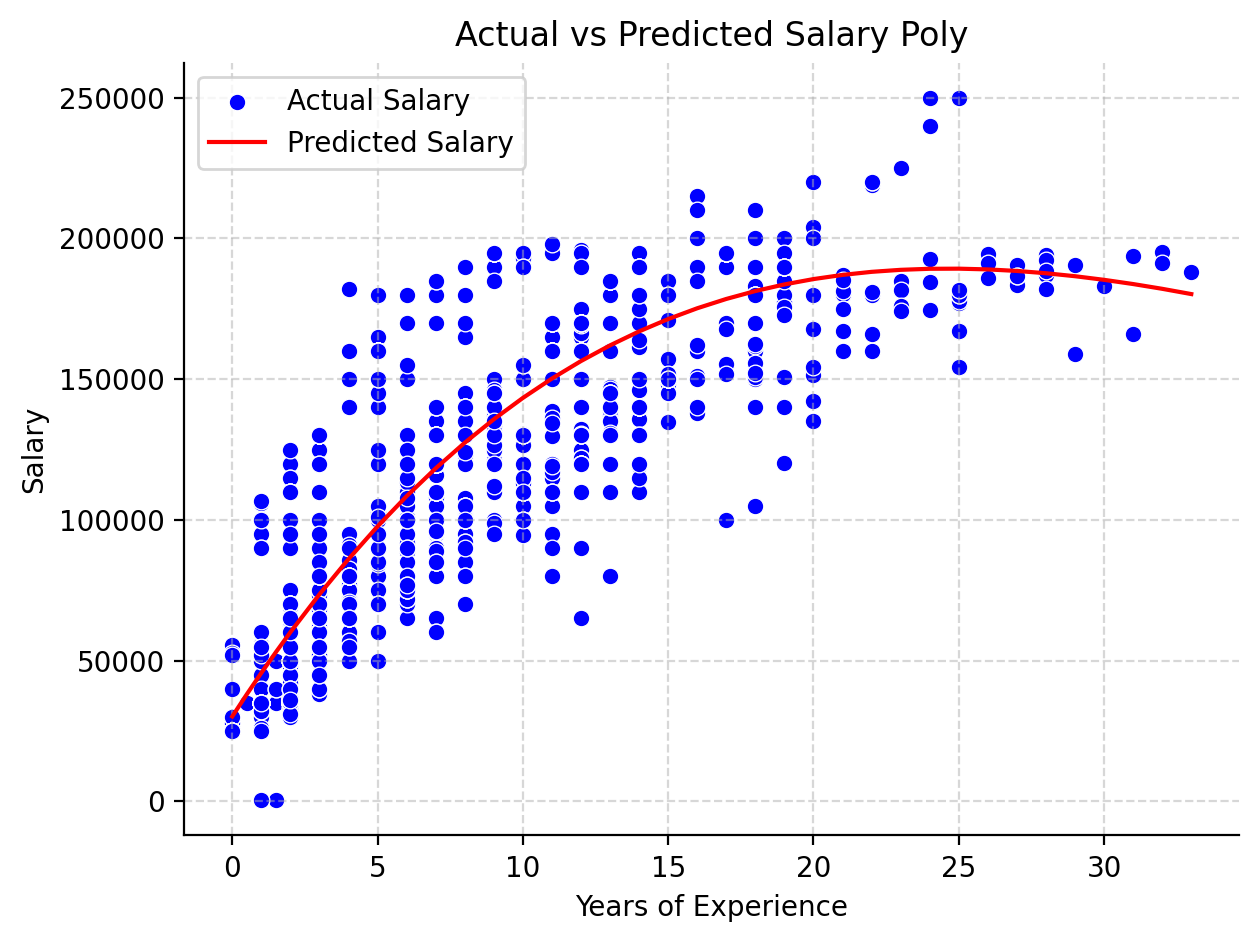

In [33]:
# Create a scatter plot for actual values
sns.scatterplot(x=x_test.squeeze(), y=y_test.squeeze(), color='blue', label='Actual Salary')

# Create a line plot for predicted values
sns.lineplot(x=x_test.squeeze(), y=y_pred_poly.squeeze(), color='red', label='Predicted Salary')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary Poly')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

#### KDE
using kernel density estimate (KDE) plot to compare the distribution of the actual salary values (red curve) with the distribution of the predicted salary values (blue curve). overall the distribution between actuals vs predicted looks p good

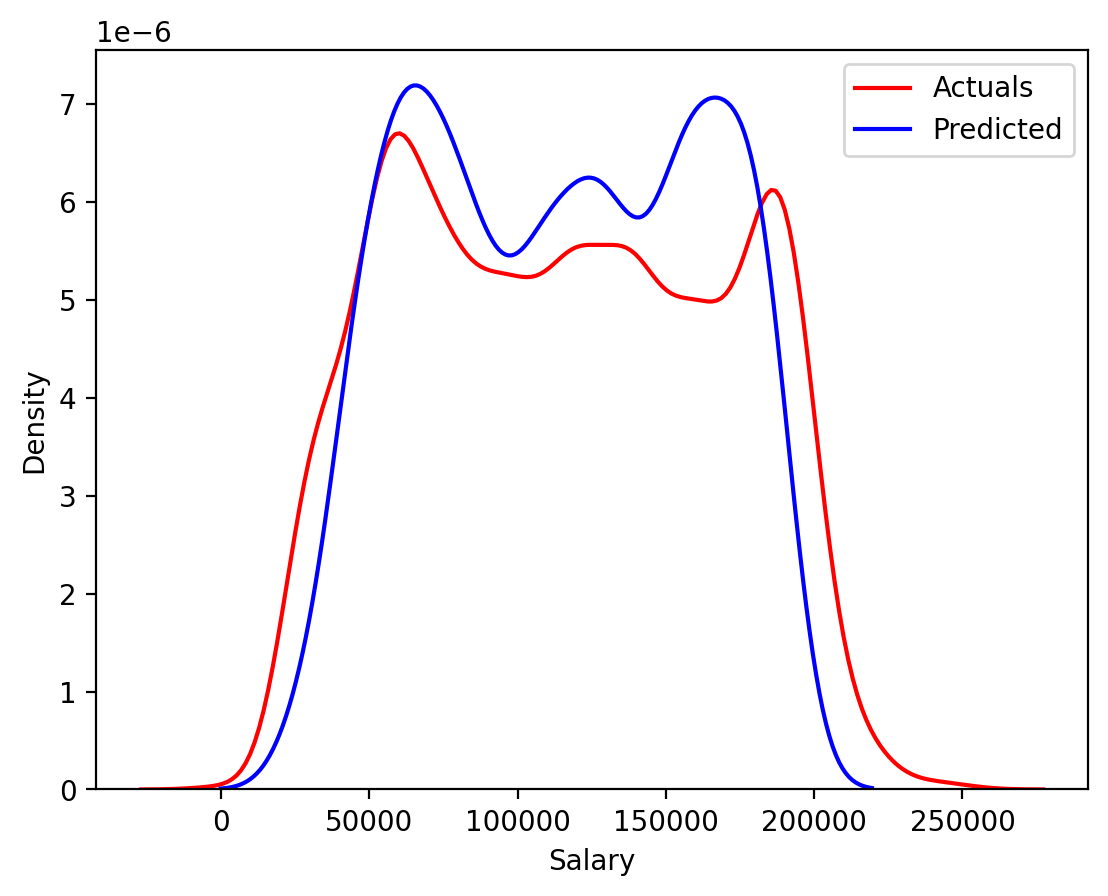

In [34]:
axl = sns.kdeplot(df['Salary'] , color = 'r', label = 'Actuals')
sns.kdeplot(np.ravel(y_pred_poly), color='b', ax=axl, label = 'Predicted')

# Show the plot
plt.legend()
plt.show()

#### Residuals
Residuals = (y_test - y_pred)

A residual plot is a graph that helps us understand how well a regression model fits the data by visualizing the differences between the observed values and the predicted values (called residuals). In simple terms, it shows us how much the model's predictions are off from the actual values.

Good vs bad residual plot: https://www.statology.org/good-vs-bad-residual-plot/

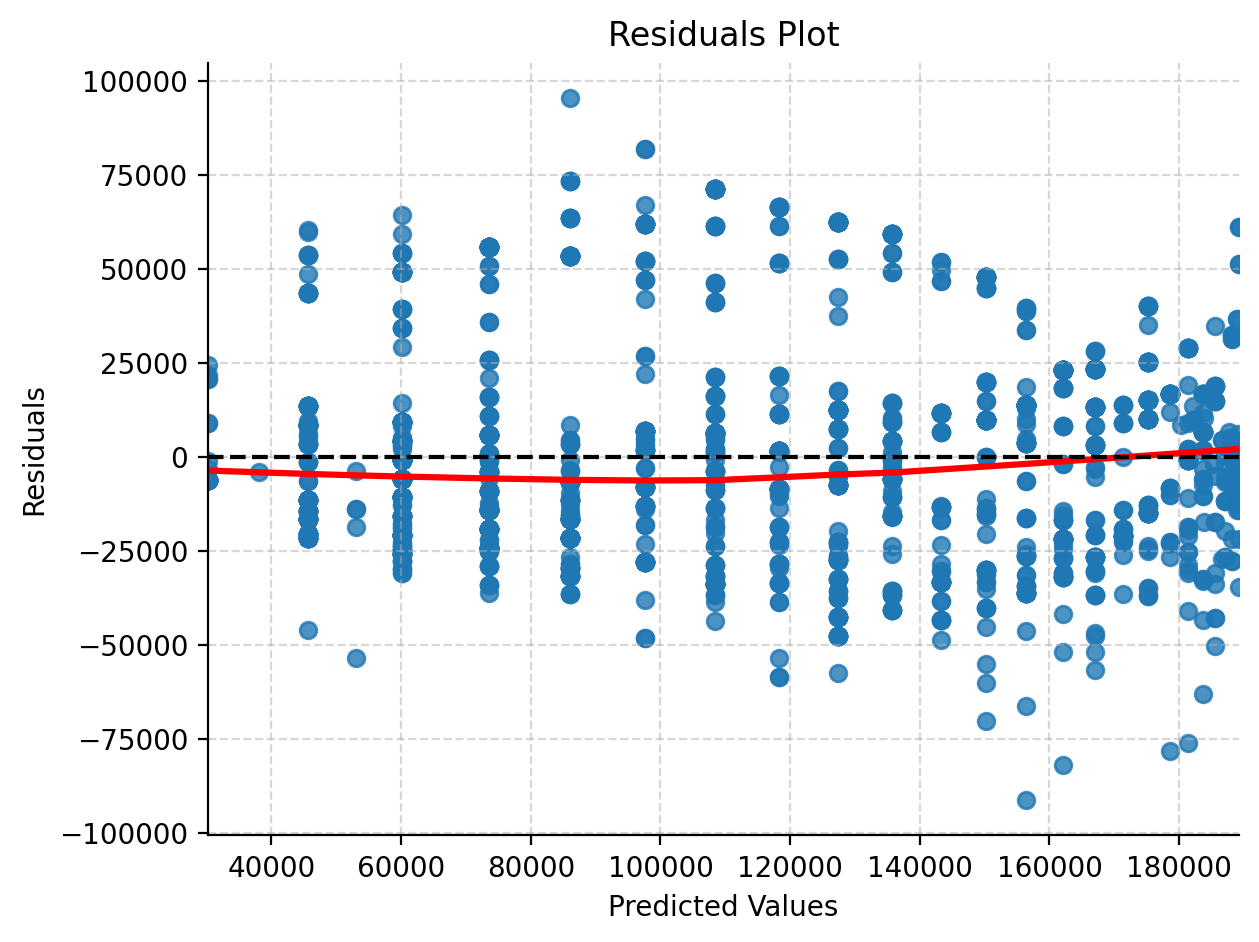

In [35]:
# Calculate the residuals
residuals = np.ravel(y_test - y_pred_poly)

# Create a scatter plot of residuals
sns.residplot(x=y_pred_poly, y=residuals, lowess=True, line_kws=dict(color="r"))

# Add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Adjust the plot aesthetics
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
years_of_exp_input = widgets.FloatText(description='Years of Experience:')

In [37]:
output = widgets.Output()

def make_predictions(years_of_exp):
    x_input = poly_features.transform([[years_of_exp]])
    predictions = poly_reg.predict(x_input)
    return predictions

def handle_input_change(change):
    output.clear_output()
    with output:
        years_of_exp = years_of_exp_input.value
        predictions = make_predictions(years_of_exp)
        actual_salary = df.loc[df['Years of Experience'] == years_of_exp, 'Salary'].values
        if actual_salary.size > 0:
            actual_salary = actual_salary[0]
            print("Predicted Salary:", predictions)
            print("Actual Salary:", actual_salary)
            print("Difference:", predictions - actual_salary)
        else:
            print("Actual Salary: none")
            print("Predicted Salary:", predictions)

years_of_exp_input.observe(handle_input_change, names='value')

# Display the input widget and the output widget
display(years_of_exp_input)
display(output)

FloatText(value=0.0, description='Years of Experience:')

Output()

### Multivariable Polynomial Model
The polynomial model was p good but what if we try to add more signals to predicted salary. Like age and education level

In [38]:
#### Multivariable Polynomial Regression
features_poly = df[['Age', 'Years of Experience', 'Education Level Int']]
target_poly = df[['Salary']]

# Split the data into training and test sets
features_train_poly, features_test_poly, target_train_poly, target_test_poly = train_test_split(features_poly, target_poly, test_size=0.3, random_state=101)

# Create polynomial features
poly_features = PolynomialFeatures(degree=5) #should probs rename this 
features_train_poly = poly_features.fit_transform(features_train_poly)

# Fit the multivariable polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(features_train_poly, target_train_poly)

# Transform the test set features
features_test_poly = poly_features.transform(features_test_poly)

# Make predictions on the test set
predictions_poly = poly_reg.predict(features_test_poly)

# Evaluate the model performance
mse_poly = mean_squared_error(target_test_poly, predictions_poly)
r2_poly = r2_score(target_test_poly, predictions_poly)
print("MSE:", mse_poly)
print("R-squared:", r2_poly)

MSE: 503098771.37848645
R-squared: 0.8228768746746228


we have a much better r sqaured and MSE lets graph our KDE

#### KDE

using kernel density estimate (KDE) plot to compare the distribution of the actual salary values (red curve) with the distribution of the predicted salary values (blue curve). overall the distribution between actuals vs predicted looks p good

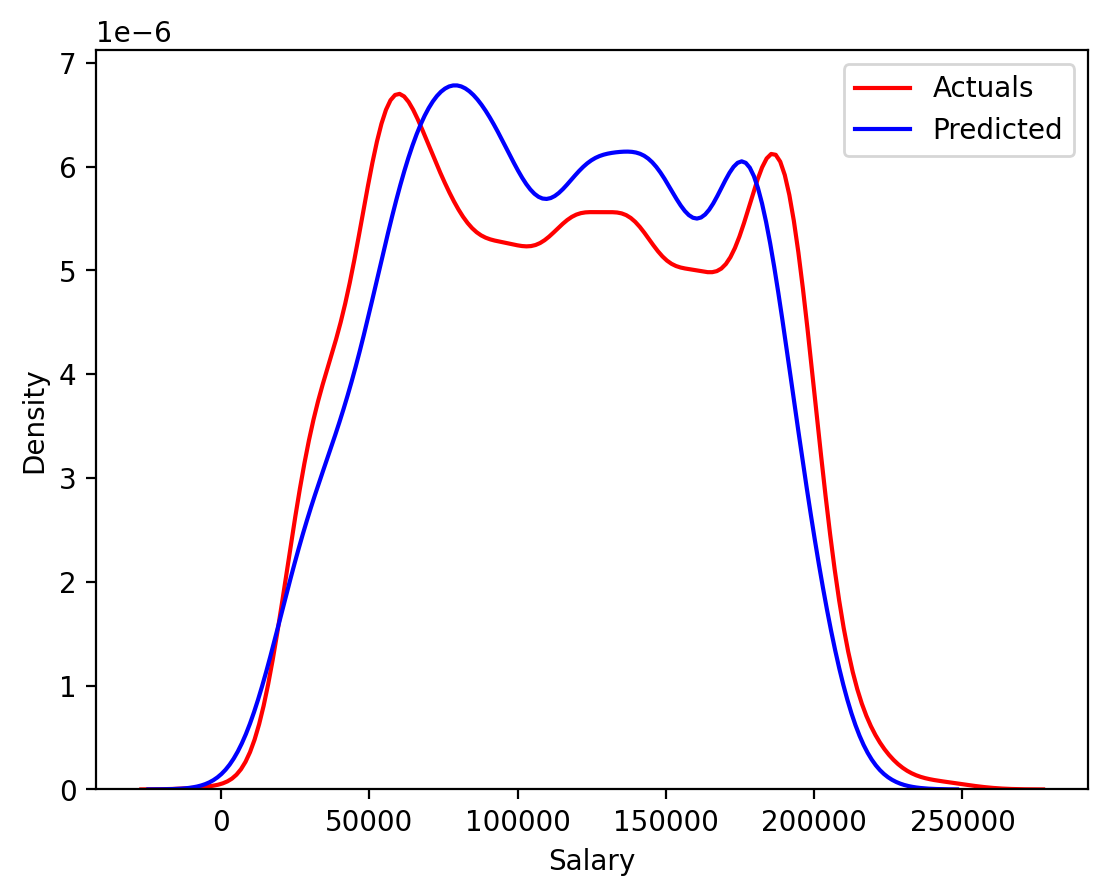

In [39]:
axl = sns.kdeplot(df['Salary'] , color = 'r', label = 'Actuals')
sns.kdeplot(np.ravel(predictions_poly), color='b', ax=axl, label = 'Predicted')

# Show the plot
plt.legend()
plt.show()

#### Residuals
Time for residules: Residuals = (y_test - y_pred)

A residual plot is a graph that helps us understand how well a regression model fits the data by visualizing the differences between the observed values and the predicted values (called residuals). In simple terms, it shows us how much the model's predictions are off from the actual values.

Good vs bad residual plot: https://www.statology.org/good-vs-bad-residual-plot/

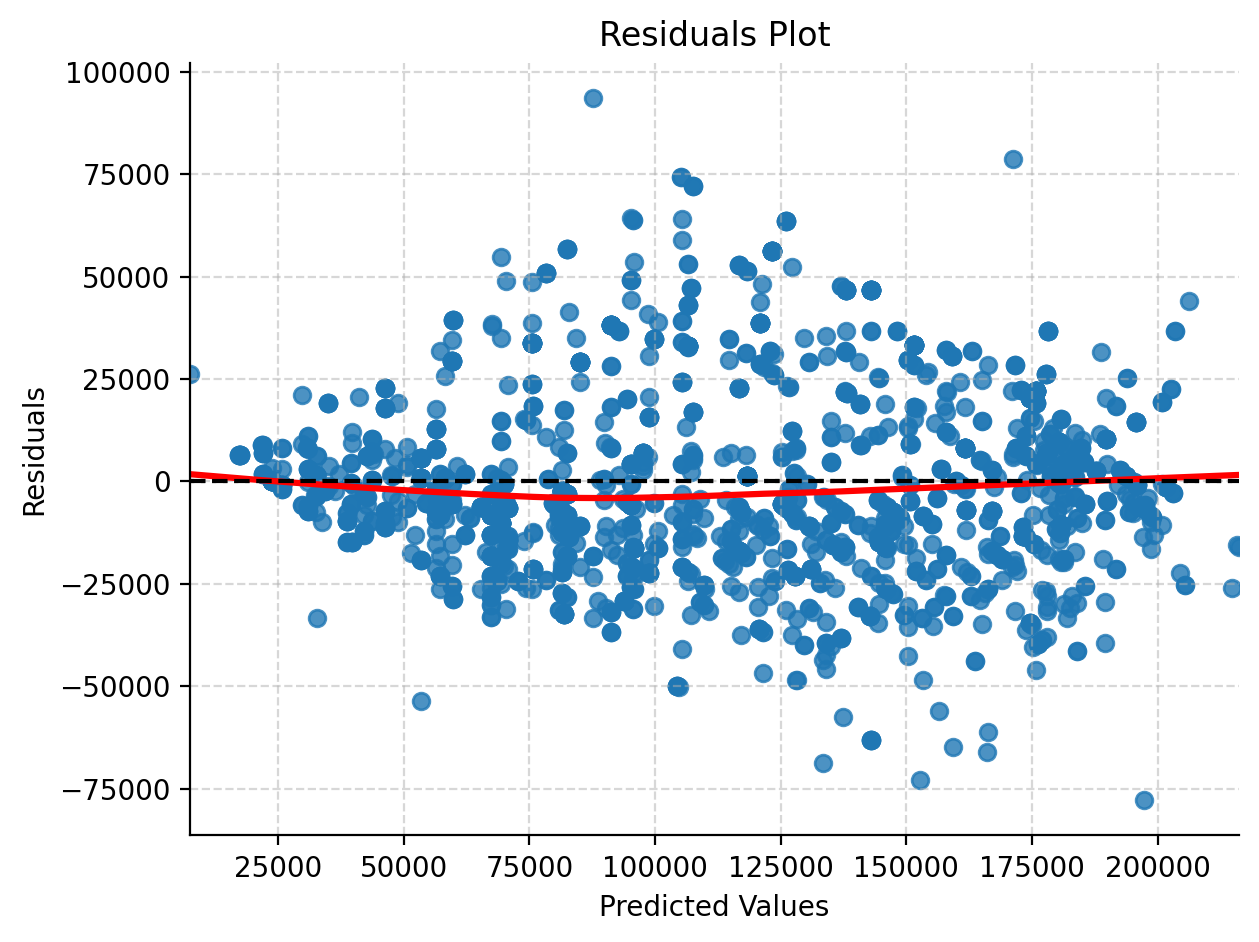

In [40]:
# Calculate the residuals
multi_residuals = target_test_poly - predictions_poly

# Create a scatter plot of residuals
sns.residplot(x=predictions_poly, y=multi_residuals, lowess=True, line_kws=dict(color="r"))

# Add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Adjust the plot aesthetics
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

I am happy with this model now i would like to use my model to predict all values instead of just 30%

In [41]:
#Transform
predicted_salary_poly = poly_features.transform(features_poly)

# Make predictions on the df
predicted_salary = poly_reg.predict(predicted_salary_poly)

# Add columns
df['Predicted Salary'] = predicted_salary.round(1)
df['Diff'] = df['Salary'] - df['Predicted Salary']

#Display
display(df)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education Level Int,Gender Int,Predicted Salary,Diff
0,32.0,Male,Bachelor,Software Engineer,5.0,90000.0,1,0.0,73927.8,16072.2
1,28.0,Female,Master,Data Analyst,3.0,65000.0,2,1.0,78354.4,-13354.4
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,3,0.0,172014.3,-22014.3
3,36.0,Female,Bachelor,Sales Associate,7.0,60000.0,1,1.0,88593.3,-28593.3
4,52.0,Male,Master,Director,20.0,200000.0,2,0.0,187186.2,12813.8
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0,3,1.0,203142.2,-3142.2
6700,32.0,Male,High School,Sales Associate,3.0,50000.0,0,0.0,47683.1,2316.9
6701,30.0,Female,Bachelor,Financial Manager,4.0,55000.0,1,1.0,70668.3,-15668.3
6702,46.0,Male,Master,Marketing Manager,14.0,140000.0,2,0.0,162946.6,-22946.6


#### Viz

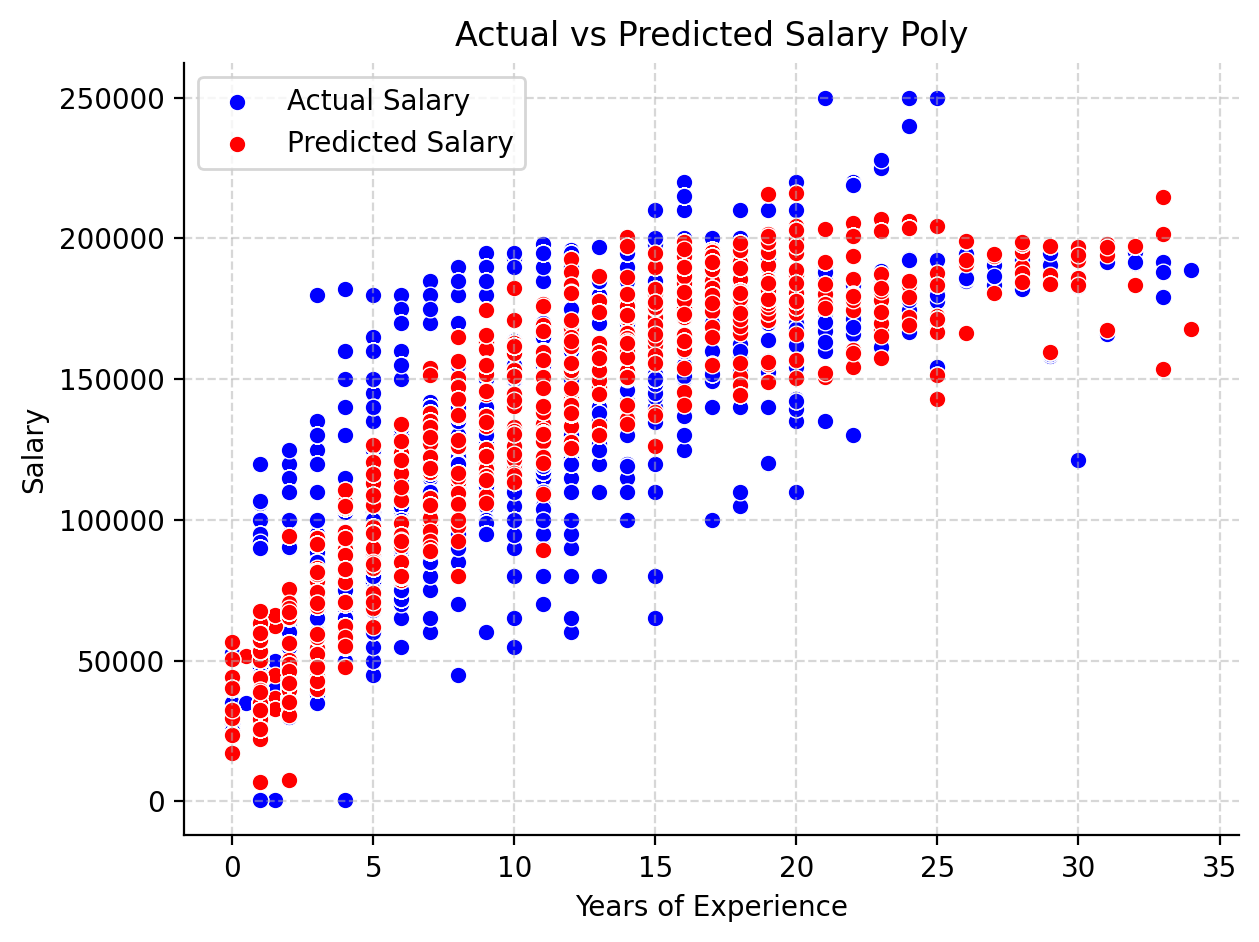

In [42]:
# Create a scatter plot for actual values
sns.scatterplot(x=df['Years of Experience'], y=df['Salary'], color='blue', label='Actual Salary')

# Create a line plot for predicted values
sns.scatterplot(x=df['Years of Experience'], y=df['Predicted Salary'], color='red', label='Predicted Salary')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary Poly')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

### Random Forest
Random Forest is an ensemble learning method that combines multiple decision trees to create a more robust and accurate predictive model.

Imagine you have a bunch of friends, and you want to make a decision together, like choosing where to go for lunch. Instead of asking just one friend for their opinion, you decide to ask multiple friends and then take a vote.

`RandomForestRegressor` works in a similar way for making predictions in regression problems. Instead of relying on just one "friend" (single decision tree) to make predictions, it gathers predictions from multiple "friends" (many decision trees) and combines their opinions to make a final decision.

Each "friend" (decision tree) makes a prediction based on the input data, but they all use different parts of the data because they were trained on random subsets. This randomness helps each tree focus on different aspects of the problem. After all the "friends" have given their predictions, the `RandomForestRegressor` takes the average (for regression tasks) of all the predictions to arrive at the final prediction.

This "wisdom of the crowd" approach helps reduce errors and gives more reliable predictions. It's like taking everyone's opinions into account rather than just relying on one person's judgment.

By using many decision trees together, `RandomForestRegressor` becomes more robust and better at handling different types of data. It can deal with noisy or complex data and tends to generalize well to new, unseen data.

In [53]:
x = df[['Years of Experience']]
y = df[['Salary']]

x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=101)
y_train = y_train.ravel()

# create a random forest regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model to the training data
model.fit(x_train, y_train)

# make predictions on the test data
y_pred = model.predict(x_test)

mae_rfr = mean_absolute_error(y_test, y_pred)
round(mae_rfr,2) 

20974.67

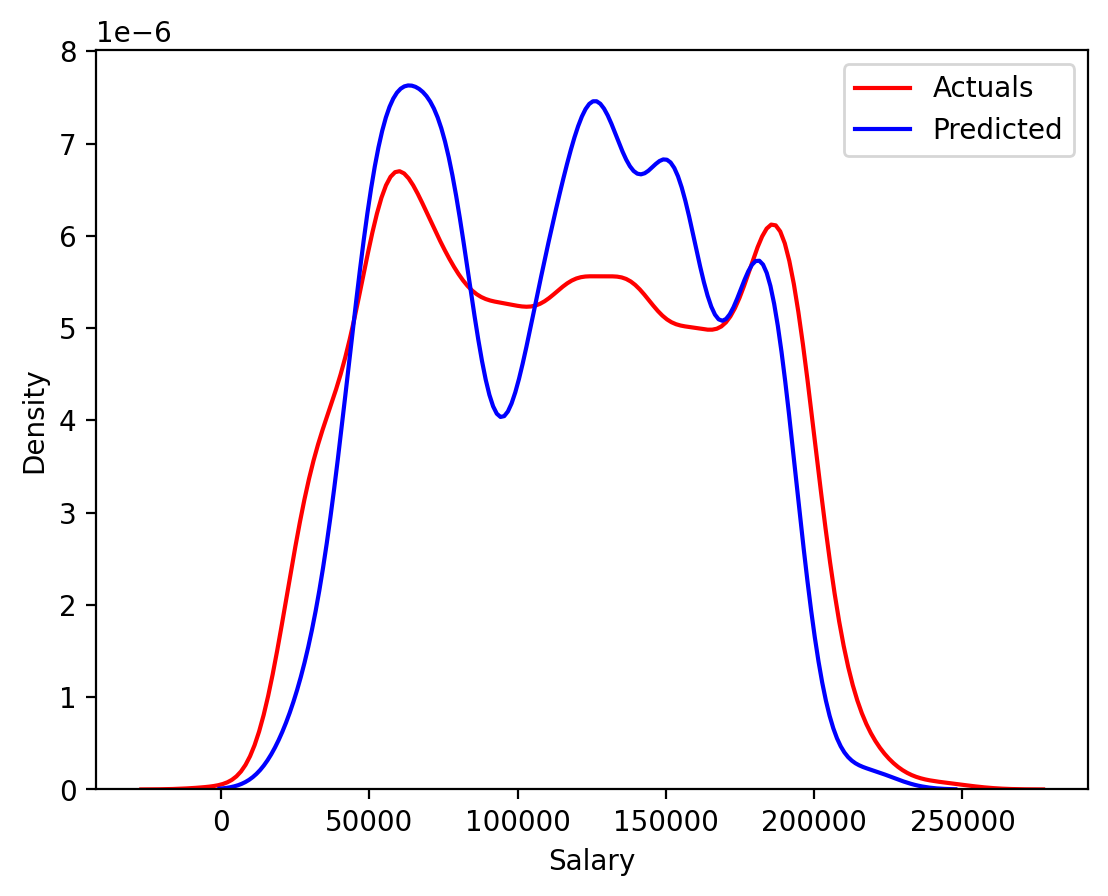

In [56]:
axl = sns.kdeplot(df['Salary'] , color = 'r', label = 'Actuals')
sns.kdeplot(y_pred, color='b', ax=axl, label = 'Predicted')

# Show the plot
plt.legend()
plt.show()

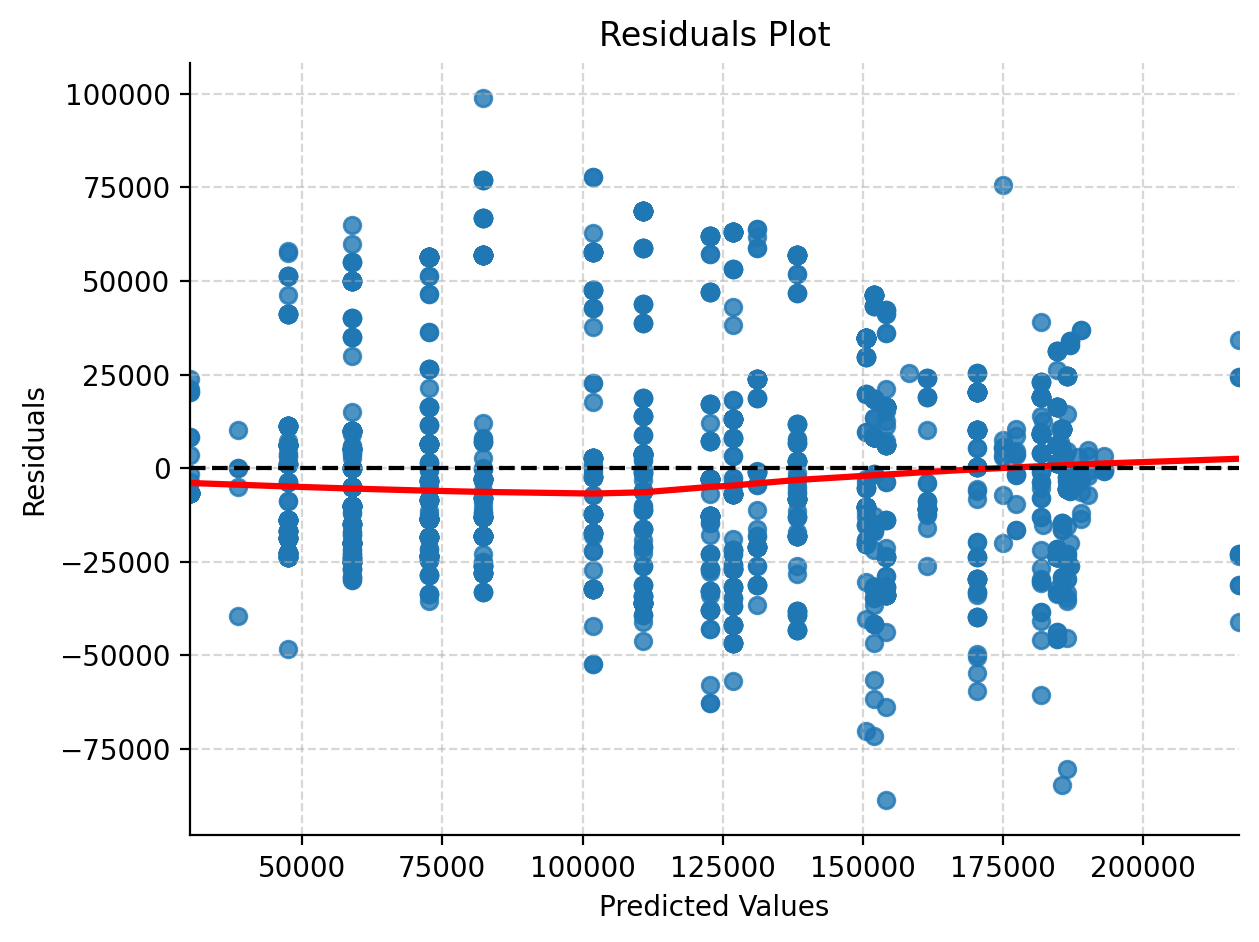

In [61]:
# Convert y_pred and y_test to 1-dimensional arrays using ravel()
y_pred = y_pred.ravel()
y_test = y_test.ravel()

# Calculate the residuals
residuals = y_test - y_pred

# Create a scatter plot of residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws=dict(color="r"))

# Add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Adjust the plot aesthetics
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Scratch

### Linear Model
Now what we looked at the polynomial model lets see what the linear regression model looks like

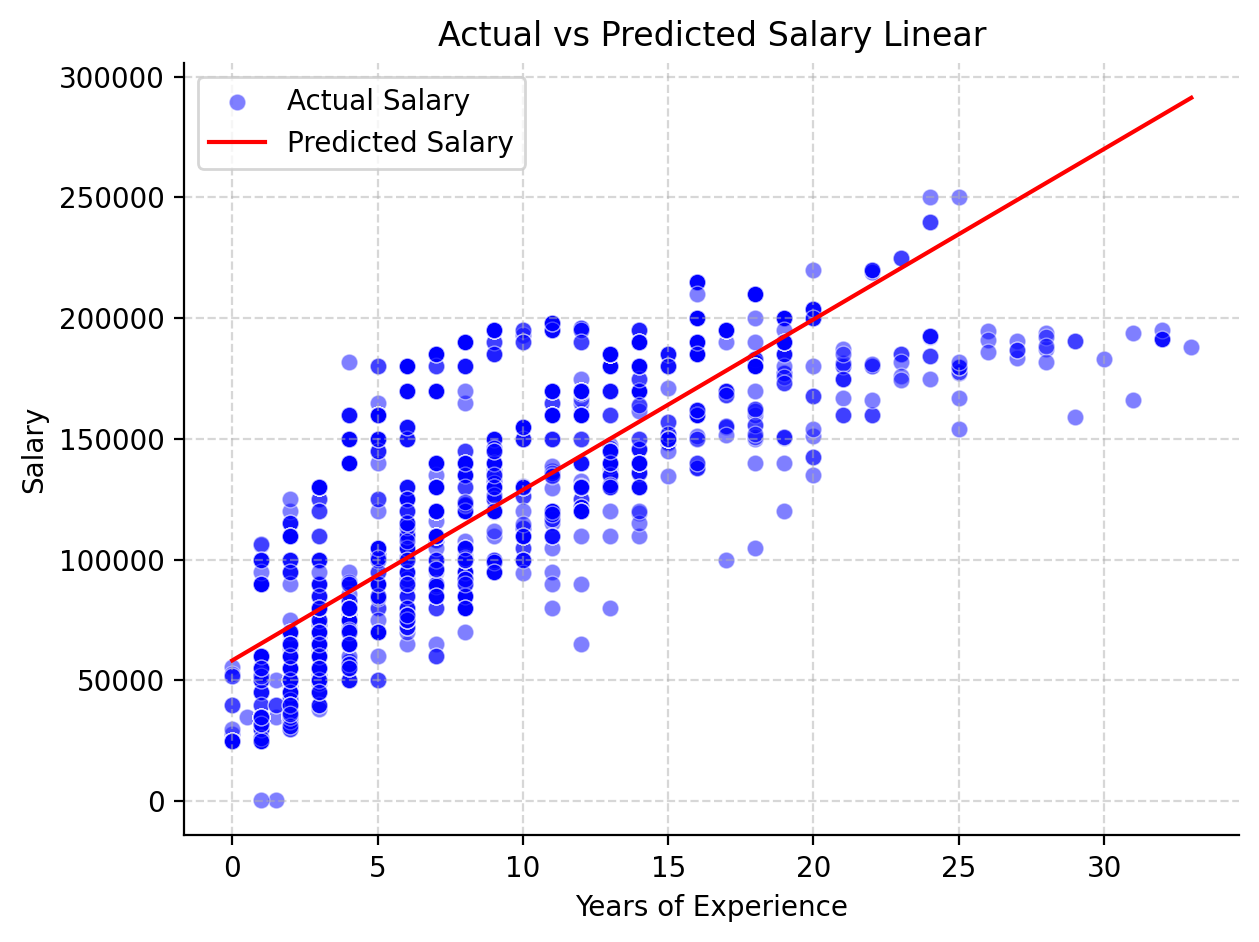

In [44]:
# Create a scatter plot for actual values
sns.scatterplot(x=x_test.squeeze(), y=y_test.squeeze(), color='blue', alpha=0.5, label='Actual Salary')

# Create a line plot for predicted values
sns.lineplot(x=x_test.squeeze(), y=y_pred_linear.squeeze(), color='red', label='Predicted Salary')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary Linear')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.legend()
plt.tight_layout()
plt.show()

#### KDE

Like we mentioned before the kernel density estimate (KDE) plot is used to visualize the distribution of actuals vs predicted salaries. In this chart we can see that the distribution between actuals vs predicted is quite different

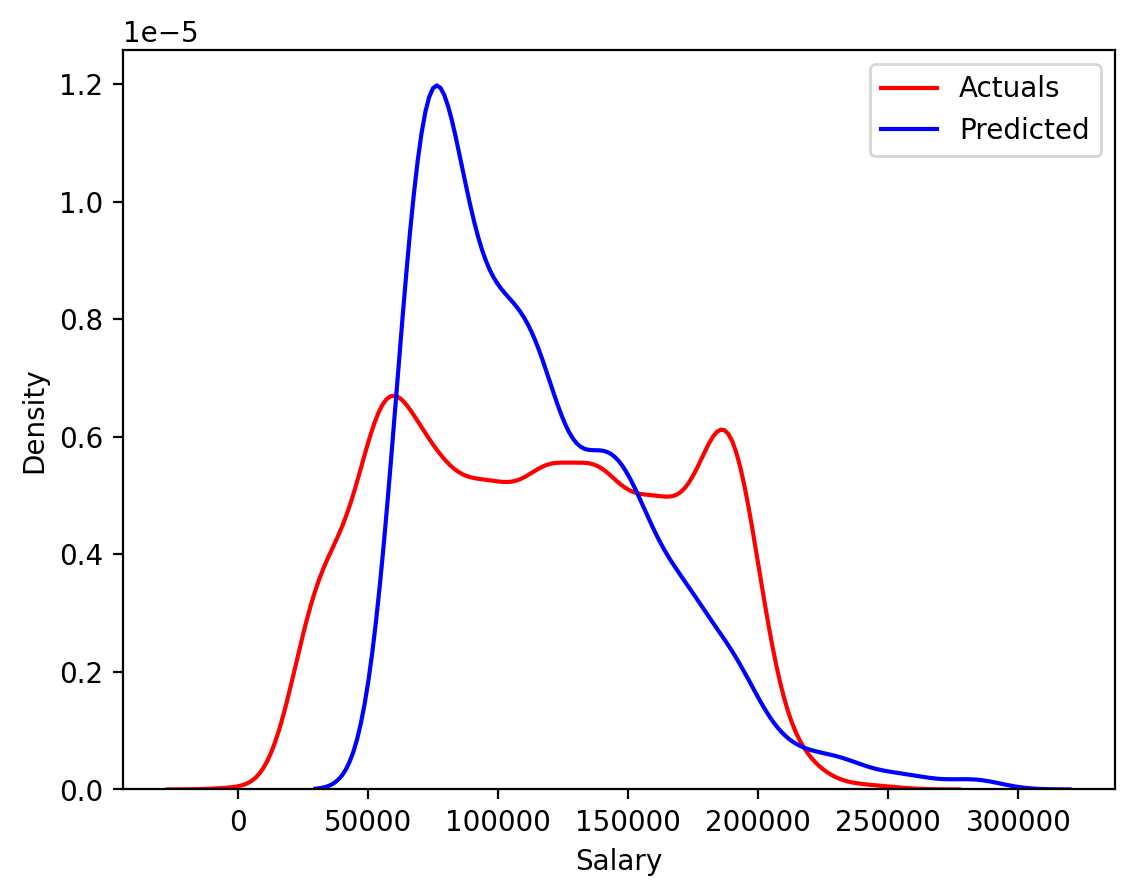

In [45]:
axl = sns.kdeplot(df['Salary'] , color = 'r', label = "Actuals")
sns.kdeplot(np.ravel(y_pred_linear), color='b', ax=axl, label = "Predicted")

# Show the plot
plt.legend()
plt.show()

#### Residuals
Residuals = (y_test - y_pred)

Taking a look at the plot we can see that there seems to be a curve starting at the 2k mark. Telling us that the linear regression model doesn't accurately capture the relationship between YOE and salary

Good vs bad residual plot: https://www.statology.org/good-vs-bad-residual-plot/

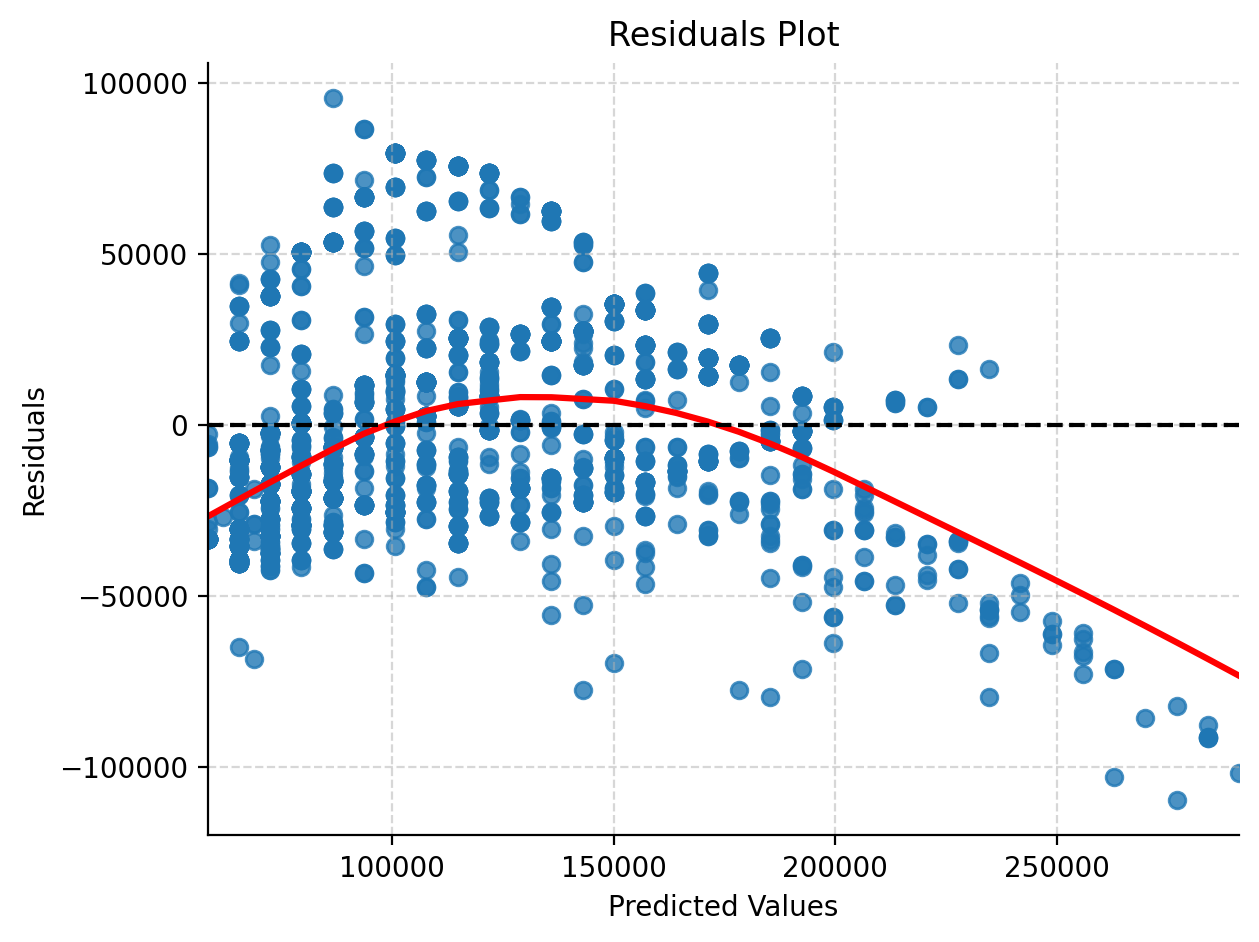

In [46]:
# Calculate the residuals
residuals = np.ravel(y_test - y_pred_linear)

# Create a scatter plot of residuals
sns.residplot(x=y_pred_linear, y=residuals, lowess=True, line_kws=dict(color="r"))

# Add a horizontal line at y = 0 for reference
plt.axhline(y=0, color='black', linestyle='--')

# Add labels and a title
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

# Adjust the plot aesthetics
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

In [47]:
avg_salary_by_age = df.groupby('Age')['Salary'].mean()

# Create a dropdown widget for job title selection
job_title_dropdown = widgets.Dropdown(
    options = df['Job Title'].unique(),
    description = 'Job Title:',
    value = df['Job Title'].unique()[0]
)

def update_plot(job_title):
    filtered_data = df[df['Job Title'] == job_title]
    avg_salary_by_age_filtered = filtered_data.groupby('Age')['Salary'].mean()

    # Create a line plot
    plt.plot(avg_salary_by_age_filtered.index, avg_salary_by_age_filtered.values, marker='o')

    # Cosmetics
    plt.xlabel('Age')
    plt.ylabel('Average Salary')
    plt.title('Average Salary by Age (Filtered by Job Title)')

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Display the plot
    plt.show()

widgets.interactive(update_plot, job_title=job_title_dropdown)

interactive(children=(Dropdown(description='Job Title:', options=('Software Engineer', 'Data Analyst', 'Senior…

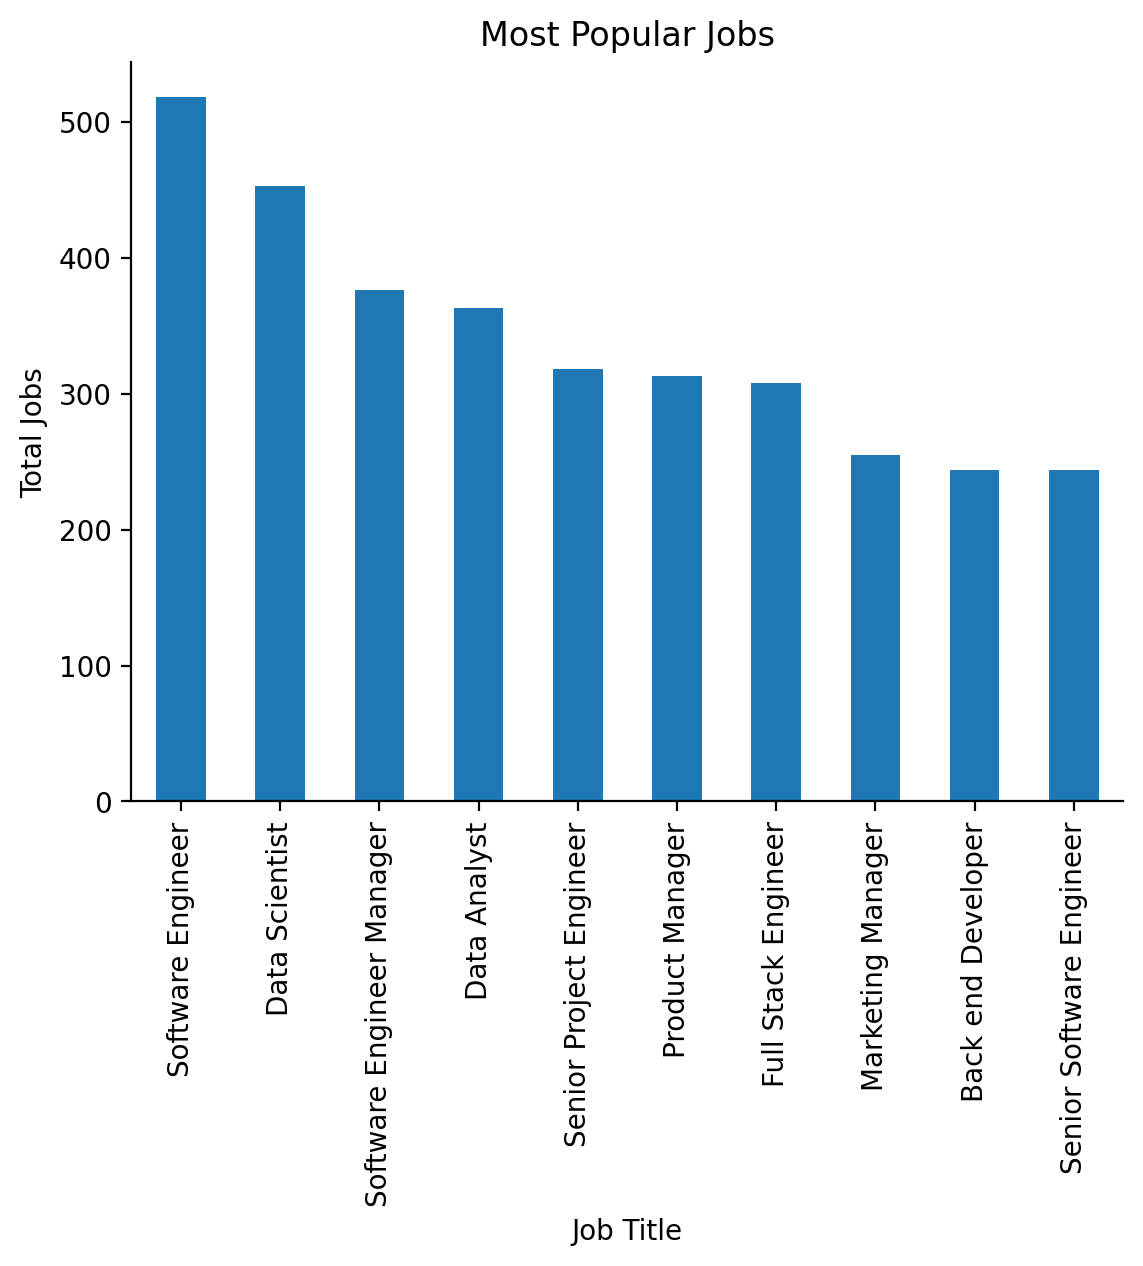

In [48]:
# Data
job_title_dist = df['Job Title'].value_counts()

# Limit to top 50 job titles
top_50_job_titles = job_title_dist.head(10)

# Create a bar chart
top_50_job_titles.plot.bar()

# Cosmetics
plt.xlabel('Job Title')
plt.ylabel('Total Jobs')
plt.title('Most Popular Jobs')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

In [49]:
model = LinearRegression()

x = df[['Age']]
y = df[['Salary']]

model.fit(x,y)
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.5300722804270507


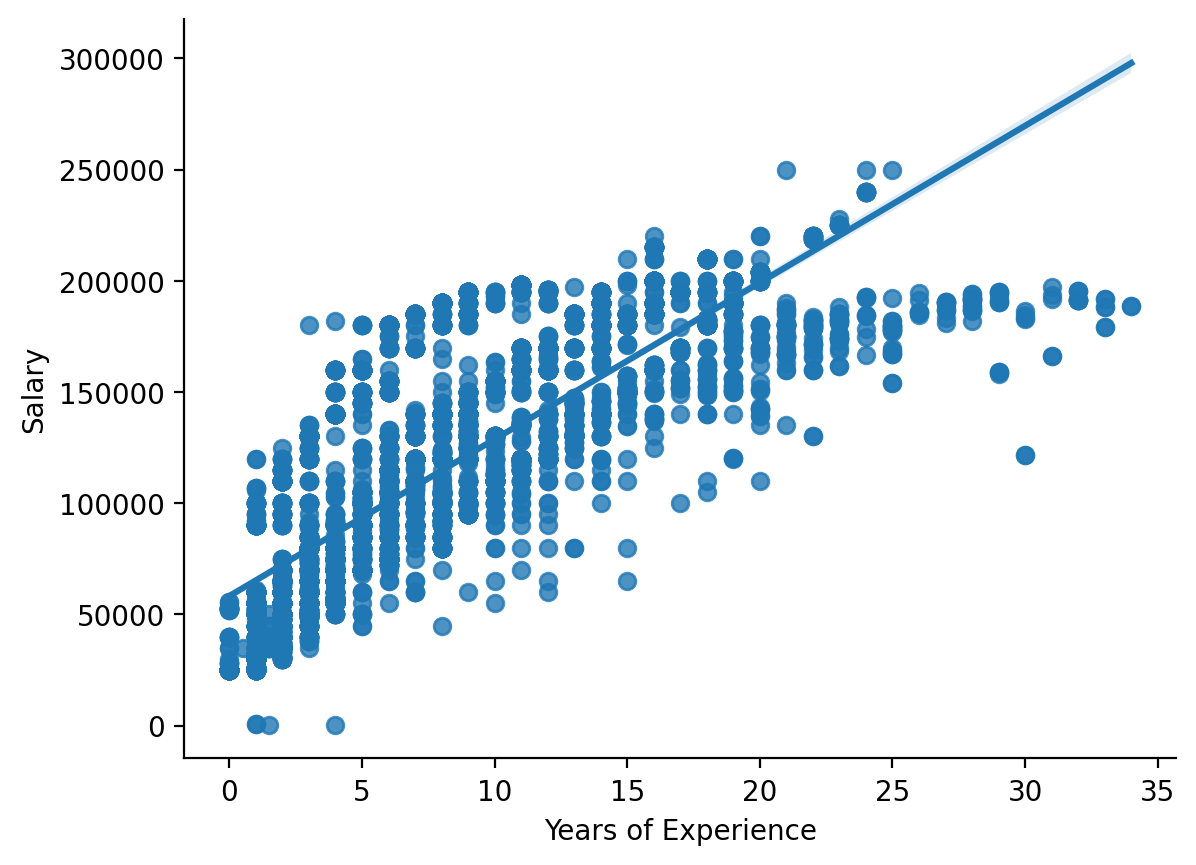

In [50]:
# Regression for Salary and YOE
sns.regplot(x="Years of Experience", y="Salary", data=df) #plots a linear regresson model fit

#cosmetics
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

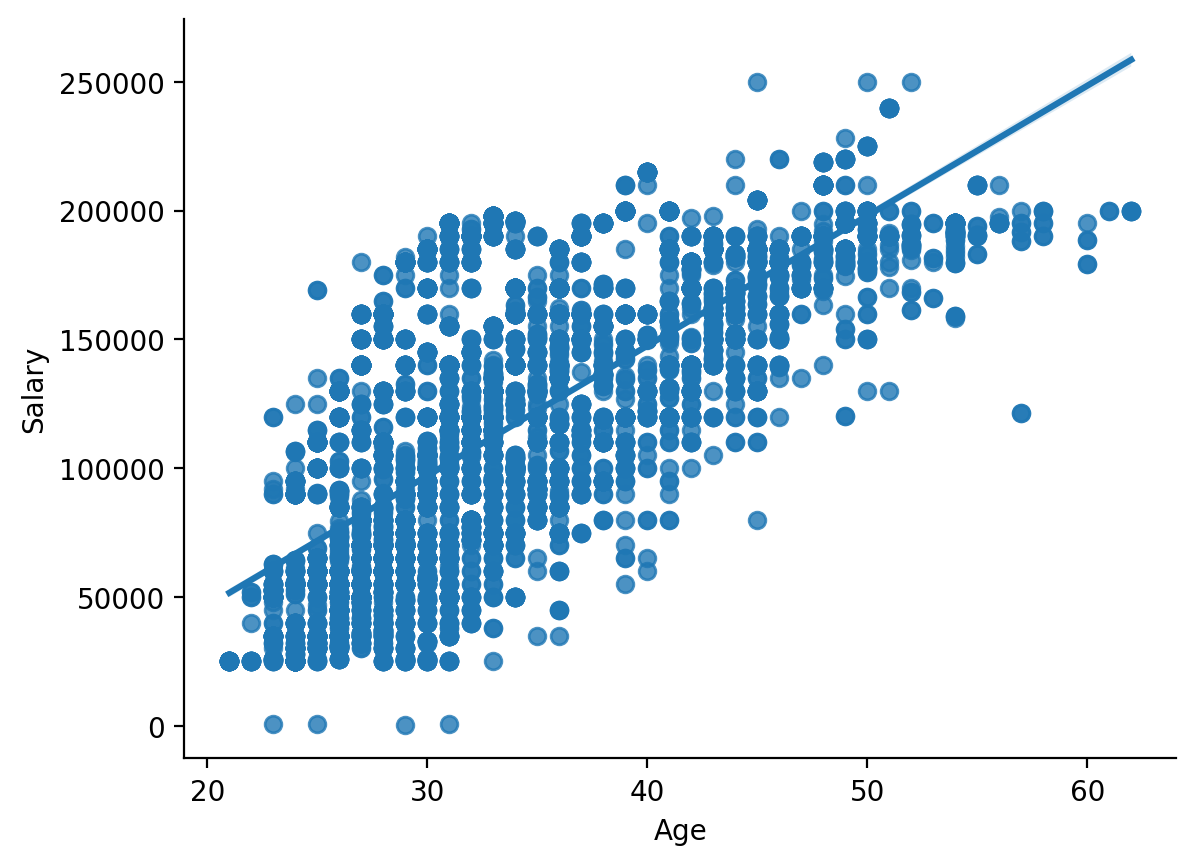

In [51]:
# Regression for Salary and Age
sns.regplot(x="Age", y="Salary", data=df) #plots a linear regresson model fit

#cosmetics
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
